# Compare DE results Oligos

Compare DE genes in oligo clusters with jaekel data. 

Inspiration from: https://github.com/AllenInstitute/SEA-AD_2024/blob/main/Figures/Figure%207.ipynb

In [2]:
# import standard packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import anndata as ad

# import single-cell packages
import scanpy as sc
#import squidpy as sq

#from spatialdata_io import merscope #spatialdata reader

from pathlib import Path

# set verbosity levels
sc.settings.verbosity = 2

In [12]:
sys.path.insert(0, "../")

from paths import DATA_DIR, RESULTS_DIR, FIG_DIR, GABITTO_DIR
RESULTS_DIR_SEAAD = Path(RESULTS_DIR, 'seaad')
FIG_DIR = Path(FIG_DIR, 'seaad')
sc.settings.figdir = str(FIG_DIR)

In [73]:
os.path.join(GABITTO_DIR, "Oligo_Oligo_1_versus_all_DE.csv")

'/lustre/groups/ml01/projects/2023_ad_jaekel/gabitto25/Oligo_Oligo_1_versus_all_DE.csv'

In [7]:
gabitto_df = pd.read_csv(os.path.join(GABITTO_DIR, "Oligo_Oligo_1_versus_all_DE.csv"), index_col=0)
gabitto_df.head()

,logFC_(Intercept),logFC_Age_at_Death_binned_codes,logFC_SexM,logFC_Genes_detected,logFC_Race_choice_WhiteUnchecked,logFC_method10xMulti,logFC_comparison1,se_(Intercept),se_Age_at_Death_binned_codes,se_SexM,...,se_method10xMulti,se_comparison1,p_(Intercept),p_Age_at_Death_binned_codes,p_SexM,p_Genes_detected,p_Race_choice_WhiteUnchecked,p_method10xMulti,p_comparison1,gene_id
AL627309.1,-12.734199,-0.000965,-0.022892,0.000324,-0.134723,0.418203,-0.066490,0.052262,0.090400,0.101399,...,0.107366,0.106819,0.0,0.991486,0.821390,8.257034e-18,0.646785,9.815017e-05,0.533641,4
AL627309.5,-11.807904,0.011393,-0.034020,0.000194,-0.089027,0.180791,0.038984,0.041624,0.073374,0.083178,...,0.074726,0.068039,0.0,0.876612,0.682539,1.138752e-14,0.707687,1.554654e-02,0.566672,7
LINC01409,-9.942194,0.079288,-0.016854,0.000241,0.139723,0.284193,-0.097813,0.020699,0.036963,0.041745,...,0.032042,0.030979,0.0,0.031946,0.686407,9.039481e-97,0.231383,7.353321e-19,0.001592,15
LINC00115,-11.817034,0.096778,0.056662,0.000151,-0.427717,0.135282,-0.185939,0.048319,0.087065,0.097573,...,0.082244,0.077323,0.0,0.266331,0.561430,4.317399e-08,0.143558,9.999444e-02,0.016186,18
FAM41C,-12.851294,-0.106412,-0.162164,0.000314,0.104495,0.630518,-0.008983,0.052538,0.089380,0.102250,...,0.104656,0.108628,0.0,0.233830,0.112749,2.127368e-16,0.705851,1.694787e-09,0.934097,19


In [22]:
gabitto_df.columns

Index(['logFC_(Intercept)', 'logFC_Age_at_Death_binned_codes', 'logFC_SexM',
       'logFC_Genes_detected', 'logFC_Race_choice_WhiteUnchecked',
       'logFC_method10xMulti', 'logFC_comparison1', 'se_(Intercept)',
       'se_Age_at_Death_binned_codes', 'se_SexM', 'se_Genes_detected',
       'se_Race_choice_WhiteUnchecked', 'se_method10xMulti', 'se_comparison1',
       'p_(Intercept)', 'p_Age_at_Death_binned_codes', 'p_SexM',
       'p_Genes_detected', 'p_Race_choice_WhiteUnchecked', 'p_method10xMulti',
       'p_comparison1', 'gene_id'],
      dtype='object')

In [27]:
gabitto_df['logFC_comparison1'].max()

np.float64(3.594715348560258)

In [42]:
df = pd.read_csv(os.path.join(RESULTS_DIR, 'DESeq2', 'DESeq2_leiden_merged_0_vs_all.csv'))
df = df.set_index('Unnamed: 0')
df.head()

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
Unnamed: 0,,,,,,
PEX14,1.422434,0.009584,0.026782,0.357859,7.204486e-01,7.300253e-01
SPSB1,1.635277,0.189609,0.024817,7.640152,2.169649e-14,3.643506e-14
VPS13D,2.482318,0.399378,0.020964,19.050635,6.490988e-81,2.724106e-80
PHACTR4,2.638872,0.469690,0.021400,21.947935,9.062549e-107,5.028741e-106
EYA3,1.761864,0.199237,0.023817,8.365426,5.989791e-17,1.076634e-16


In [14]:
df['log2FoldChange'].min()

np.float64(-0.632562593530987)

In [15]:
df['log2FoldChange'].max()

np.float64(1.65179895168726)

Split genes in upregulated and downregulated.

In [30]:
up_gabitto = gabitto_df[gabitto_df['logFC_comparison1'] > 0].index
down_gabitto = gabitto_df[gabitto_df['logFC_comparison1'] < 0].index

In [43]:
up_jaekel = df[df['log2FoldChange'] > 0].index
down_jaekel = df[df['log2FoldChange'] < 0].index

In [51]:
def get_up_and_down_regulated_genes(df, col_name = 'log2FC'):
    up_gene_list = df[df[col_name] > 0].index
    down_gene_list = df[df[col_name] < 0].index
    return up_gene_list, down_gene_list

In [54]:
import pandas as pd
import numpy as np
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests

def perform_overlap_analysis(df1, df2, col_name_1, col_name_2, data_name_1 = '1', data_name_2 = '2'):
    """
    Perform gene overlap enrichment analysis between two datasets
    
    Parameters:
    -----------
    df1, df2: pandas.dataframe
    col_name_1, : str
        Column name for the (e.i. logFoldChange) to seperate genes into up and down regulated.
    
    Returns:
    --------
    DataFrame with overlap statistics
    """
    up_1, down_1 = get_up_and_down_regulated_genes(df1, col_name = col_name_1)
    up_2, down_2 = get_up_and_down_regulated_genes(df2, col_name = col_name_2)
    
    all_genes_1 = df1.index
    all_genes_2 = df2.index
    
    common_universe = set(all_genes_1).intersection(set(all_genes_2))
    genome_size = len(common_universe)
    
    # Filter gene lists to only include genes in common universe
    up_1_filtered = set(up_1).intersection(common_universe)
    down_1_filtered = set(down_1).intersection(common_universe)
    up_2_filtered = set(up_2).intersection(common_universe)
    down_2_filtered = set(down_1).intersection(common_universe)
    
    # Prepare results storage
    comparisons = [
        ('up', 'up', up_1_filtered, up_2_filtered),
        ('up', 'down', up_1_filtered, down_2_filtered),
        ('down', 'up', down_1_filtered, up_2_filtered),
        ('down', 'down', down_1_filtered, down_2_filtered)
    ]
    
    results = []
    
    for dir_1, dir_2, genes_1, genes_2 in comparisons:
        # Calculate overlap
        overlap_genes = genes_1.intersection(genes_2)
        n_overlap = len(overlap_genes)
        
        a = n_overlap  # in both
        b = len(genes_1) - a  # in jaekel only
        c = len(genes_2) - a  # in gabitto only
        d = genome_size - a - b - c  # in neither
        
        # Fisher's exact test
        odds_ratio, p_value = fisher_exact([[a, b], [c, d]], alternative='greater')
        
        results.append({
            f'{data_name_1}_direction': dir_1,
            f'{data_name_2}_direction': dir_2,
            f'n_{data_name_1}_genes': len(genes_1),
            f'n_{data_name_2}_genes': len(genes_2),
            'n_overlap_genes': n_overlap,
            'genome_size': genome_size,
            'overlap_p_value': p_value,
            'odds_ratio': odds_ratio,
            'overlap_genes': ','.join(sorted(overlap_genes)) if n_overlap > 0 else ''
        })
    
    # Create dataframe
    results_df = pd.DataFrame(results)
    
    # FDR correction
    results_df['overlap_p_value_fdr'] = multipletests(
        results_df['overlap_p_value'], 
        method='fdr_bh'
    )[1]
    
    return results_df

results_df = perform_overlap_analysis(gabitto_df, df, 'logFC_comparison1', 'log2FoldChange' )
results_df

,1_direction,2_direction,n_1_genes,n_2_genes,n_overlap_genes,genome_size,overlap_p_value,odds_ratio,overlap_genes,overlap_p_value_fdr
0,up,up,1248,3092,952,3667,1.000000e+00,0.419310,"AAK1,AAMDC,ABCA2,ABCA5,ABCA6,ABCC5,ABHD12,ABHD...",1.000000e+00
1,up,down,1248,2419,0,3667,1.000000e+00,0.000000,,1.000000e+00
2,down,up,2419,3092,2140,3667,4.188666e-21,2.384868,"AASS,AATF,ABAT,ABCA1,ABCA8,ABCB7,ABCG1,ABHD17B...",8.377333e-21
3,down,down,2419,2419,2419,3667,0.000000e+00,inf,"AASS,AATF,ABAT,ABCA1,ABCA8,ABCB7,ABCC4,ABCG1,A...",0.000000e+00


In [ ]:
for gabitto
gabitto_df = pd.read_csv(os.path.join(GABITTO_DIR, "Oligo_Oligo_1_versus_all_DE.csv"), index_col=0)

In [55]:
os.path.join(GABITTO_DIR, "Oligo_Oligo_1_versus_all_DE.csv")

'/lustre/groups/ml01/projects/2023_ad_jaekel/gabitto25/Oligo_Oligo_1_versus_all_DE.csv'

In [56]:
gabitto_dict = {}
for i in range(1,5):
    gabitto_dict[i] = pd.read_csv(os.path.join(GABITTO_DIR, f"Oligo_Oligo_{i}_versus_all_DE.csv"), index_col=0)

In [58]:
drummer_dict = {}
for i in ['0', '1_2', '3', '4']:
    df = pd.read_csv(os.path.join(RESULTS_DIR, 'DESeq2', f'DESeq2_leiden_merged_{i}_vs_all.csv'))
    drummer_dict[i] = df.set_index('Unnamed: 0')

In [60]:
gabitto_clusters = list(gabitto_dict.keys())
drummer_clusters = list(drummer_dict.keys())

up_df = pd.DataFrame(
    index=drummer_clusters,
    columns=gabitto_clusters,
    dtype=float
)

down_df = pd.DataFrame(
    index=drummer_clusters,
    columns=gabitto_clusters,
    dtype=float
)

In [70]:
for i, gabitto_df in gabitto_dict.items():
    for j, drummer_df in drummer_dict.items():
        results_df = perform_overlap_analysis(
            gabitto_df, drummer_df, 
            'logFC_comparison1', 'log2FoldChange',
            data_name_1='Gabitto', data_name_2='Drummer'
        )
        
        # Extract up-regulated comparison (up vs up)
        up_row = results_df[
            (results_df['Gabitto_direction'] == 'up') & 
            (results_df['Drummer_direction'] == 'up')
        ]
        up_df.loc[j, i] = up_row['odds_ratio'].values[0] if len(up_row) > 0 else np.nan
        
        # Extract down-regulated comparison (down vs down)
        down_row = results_df[
            (results_df['Gabitto_direction'] == 'down') & 
            (results_df['Drummer_direction'] == 'down')
        ]
        down_df.loc[j, i] = down_row['odds_ratio'].values[0] if len(down_row) > 0 else np.nan

print("\nUp-regulated genes odds ratios:")
print(up_df)

print("\nDown-regulated genes odds ratios:")
print(down_df)


Up-regulated genes odds ratios:
            1          2         3         4
0    0.419310  11.223213  0.790922  0.373207
1_2  1.713399   0.127914  1.066011  2.853951
3    0.530294   2.108428  3.701121  0.803776
4    4.220600   1.417906  0.825167  0.385365

Down-regulated genes odds ratios:
       1    2    3    4
0    inf  inf  inf  inf
1_2  inf  inf  inf  inf
3    inf  inf  inf  inf
4    inf  inf  inf  inf


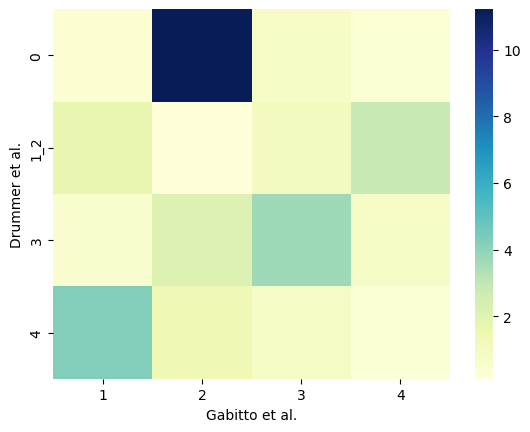

In [71]:
ax = sns.heatmap(
    up_df,
    cmap="YlGnBu",
    xticklabels=True,
    yticklabels=True,
);
ax.set(xlabel="Gabitto et al.", ylabel="Drummer et al.");
#plt.savefig(os.path.join(pwd, "output", "Figure_3_heatmap_Gabitto_Oligo_Comparison.pdf"), bbox_inches="tight")
plt.show()

In [78]:
GABITTO_DIR

PosixPath('/lustre/groups/ml01/projects/2023_ad_jaekel/gabitto25')

In [79]:
pd.read_csv(os.path.join('/lustre/groups/ml01/projects/2023_ad_jaekel/', 'green24', 'Green_2023-cell-annotation.2024-03-27.csv'), index_col=0)

,Source,Original Cell ID,Original Cell ID Alternative,library_prep,Used in analysis,Class,Class confidence,Subclass,Subclass confidence,Supertype,Supertype confidence
AAACCCAAGATCCCAT-B60-A_Merged,Green_2023,201021-B60-A_AAACCCAAGATCCCAT-1,NaN,B60-A_Merged,True,Non-neuronal and Non-neural,1.0,OPC,1.0,OPC_2,1.000000
AAACCCAAGGCGACAT-B60-A_Merged,Green_2023,201021-B60-A_AAACCCAAGGCGACAT-1,NaN,B60-A_Merged,True,Neuronal: Glutamatergic,1.0,L6 CT,1.0,L6 CT_2,0.994675
AAACCCAAGGCGTCCT-B60-A_Merged,Green_2023,201021-B60-A_AAACCCAAGGCGTCCT-1,NaN,B60-A_Merged,True,Neuronal: Glutamatergic,1.0,L5 IT,1.0,L5 IT_7,1.000000
AAACCCAAGGTTGTTC-B60-A_Merged,Green_2023,201021-B60-A_AAACCCAAGGTTGTTC-1,NaN,B60-A_Merged,False,NaN,0.0,NaN,0.0,NaN,0.000000
AAACCCAAGTCTACCA-B60-A_Merged,Green_2023,201021-B60-A_AAACCCAAGTCTACCA-1,NaN,B60-A_Merged,True,Neuronal: Glutamatergic,1.0,L2/3 IT,1.0,L2/3 IT_13,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGTCAGCTCTC-B9-B_Merged,Green_2023,191219-B9-B_TTTGTTGTCAGCTCTC-1,NaN,B9-B_Merged,False,NaN,0.0,NaN,0.0,NaN,0.000000
TTTGTTGTCCTCTCGA-B9-B_Merged,Green_2023,191219-B9-B_TTTGTTGTCCTCTCGA-1,NaN,B9-B_Merged,False,NaN,0.0,NaN,0.0,NaN,0.000000
TTTGTTGTCGCTTAAG-B9-B_Merged,Green_2023,191219-B9-B_TTTGTTGTCGCTTAAG-1,NaN,B9-B_Merged,True,Non-neuronal and Non-neural,1.0,Astrocyte,1.0,Astro_2,1.000000
TTTGTTGTCTATACGG-B9-B_Merged,Green_2023,191219-B9-B_TTTGTTGTCTATACGG-1,NaN,B9-B_Merged,False,NaN,0.0,NaN,0.0,NaN,0.000000
